In [1]:
import sys
sys.path.append("..")

import pickle

from src.environments import *
from src.agents import *
from src.agent_utils import *

## Here we experiment on the EWP (Light at the End of Tunnel) Corridor MAB

In [2]:
env = CorridorMAB.default(num_rooms = 10,
                          reward_distrib_params = [[5,1], [-2,1], [-3,1], [-4,1], [-5,1], [-6,1], [-7,1], [-8,1], [-9,1], [10,1]],
                          move_penalty = -5)

Check that the last room is actually optimal

In [3]:
env.get_true_Q(0.98)
print(env.optimal_pi)

[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]]


# UCB (Upper Confidence Bound)

### We first test with UBE

In [12]:
len_episode = 500

spl_ube = SimplePlotter('EWP_UCB_UBE',
                    env,
                    BayesianAgent.default(decision_making_method = 'UCB',
                                          decision_making_method_params = 1.5, 
                                          Q_method = 'predictive',
                                          u_method = 'UBE',
                                          name = 'beta_1p5', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'UCB',
                                          decision_making_method_params = 1, 
                                          Q_method = 'predictive',
                                          u_method = 'UBE',
                                          name = 'beta_1', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'UCB',
                                          decision_making_method_params = 0.5, 
                                          Q_method = 'predictive',
                                          u_method = 'UBE',
                                          name = 'beta_0p5', 
                                          gamma =  0.98))

spl_ube.run_experiments(len_episode, 10, fair_comparison = False)

100%|██████████| 500/500 [00:11<00:00, 44.34it/s]


In [34]:
color_codes = {'beta_1p5': "#00002f", 
               'beta_1': "#f23a14",
               'beta_0p5': "#006ffb"}

legend_codes = {'beta_1p5': r'$\beta = 1.5$', 
               'beta_1': r'$\beta = 1$',
               'beta_0p5': r'$\beta = 0.5$'}

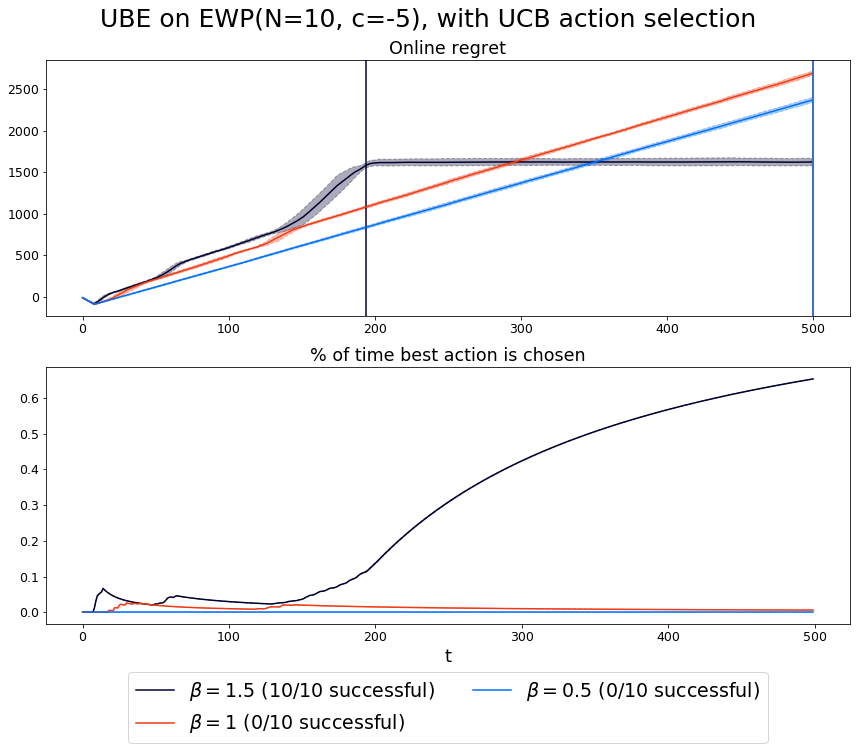

In [14]:
spl_ube.plot_regret(color_codes = color_codes, 
                    legend_codes = legend_codes, 
                    title = 'UBE on EWP(N=10, c=-5), with UCB action selection',
                    bbox = (0.5, -0.5),
                    figsize = (12,10), 
                    ncol = 2, 
                    rect = [0, -0.05, 1, 0.95],
                    dpi = 300)

In [32]:
colors = {'beta_1': {'mean': '#f23a14', 'var': '#f23a14'},
          'beta_1p5': {'mean': '#f23a14', 'var': '#f23a14'}}

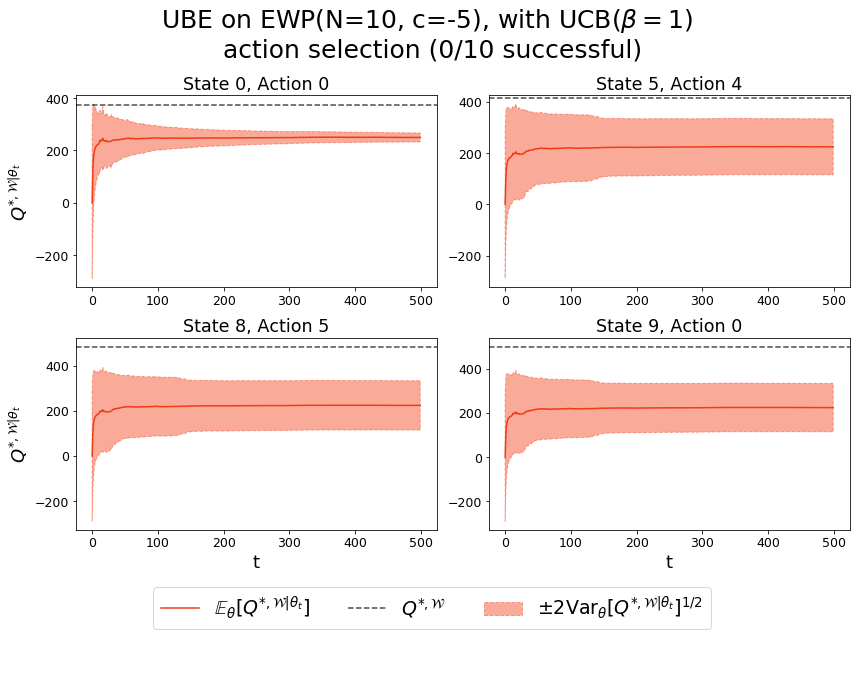

In [16]:
spl_ube.plot_Q_u(colors = colors,  
                 title = r'UBE on EWP(N=10, c=-5), with UCB($\beta = 1$)' + ' \n action selection',
                 list_agents = ['beta_1'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (5,4), (8,5), (9,0)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

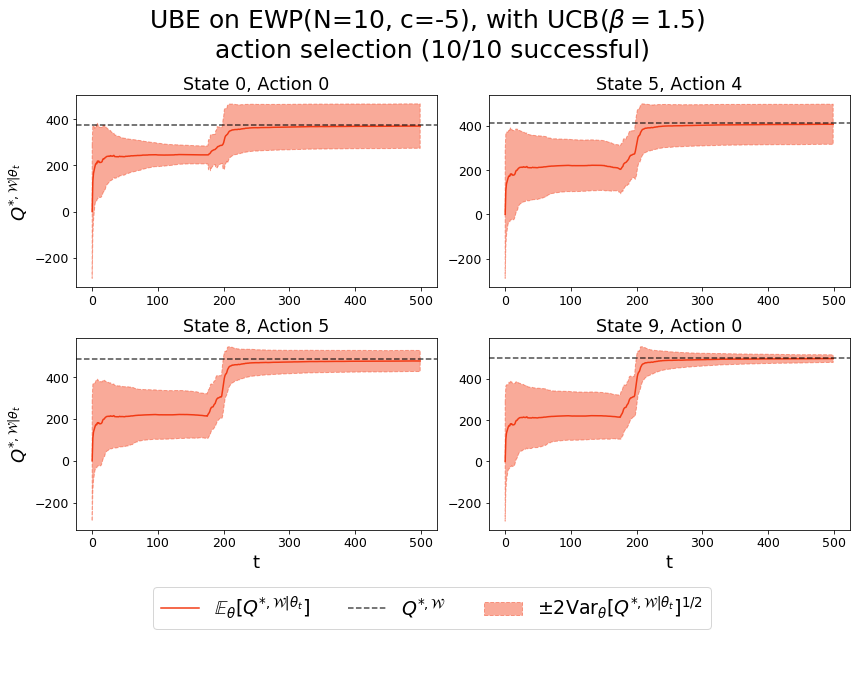

In [33]:
spl_ube.plot_Q_u(colors = colors,  
                 title = r'UBE on EWP(N=10, c=-5), with UCB($\beta = 1.5$)' + ' \n action selection',
                 list_agents = ['beta_1'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (5,4), (8,5), (9,0)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

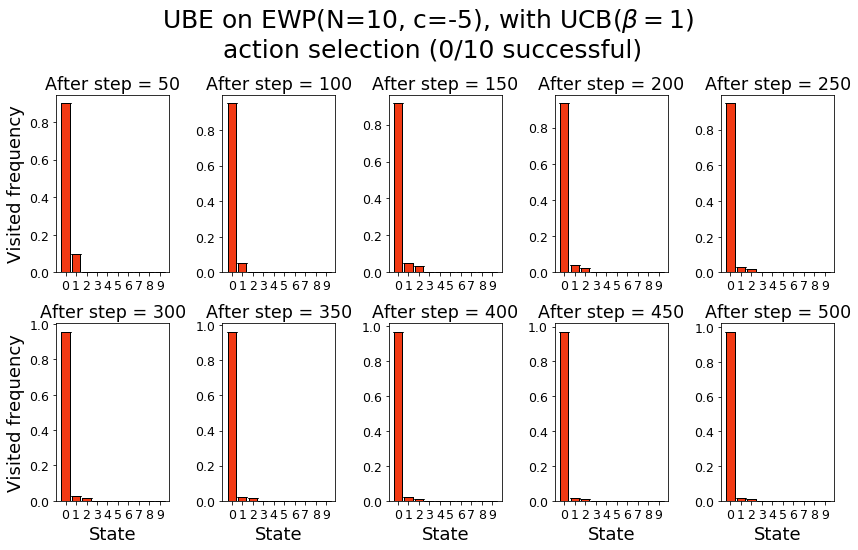

In [36]:
spl_ube.plot_state_freq(list_agents = ['beta_1'], 
                        colors = color_codes,
                        title = r'UBE on EWP(N=10, c=-5), with UCB($\beta = 1$)' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

### Then we test with EUDV

In [17]:
len_episode = 500

spl_eudv = SimplePlotter('EWP_UCB_EUDV',
                    env,
                    BayesianAgent.default(decision_making_method = 'UCB',
                                          decision_making_method_params = 1.5, 
                                          Q_method = 'predictive',
                                          u_method = 'predictive',
                                          name = 'beta_1p5', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'UCB',
                                          decision_making_method_params = 1, 
                                          Q_method = 'predictive',
                                          u_method = 'predictive',
                                          name = 'beta_1', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'UCB',
                                          decision_making_method_params = 0.5, 
                                          Q_method = 'predictive',
                                          u_method = 'predictive',
                                          name = 'beta_0p5', 
                                          gamma =  0.98))

spl_eudv.run_experiments(len_episode, 10, fair_comparison = False)

100%|██████████| 500/500 [00:19<00:00, 25.62it/s]


In [18]:
color_codes = {'beta_1p5': "#00002f", 
               'beta_1': "#f23a14",
               'beta_0p5': "#006ffb"}

legend_codes = {'beta_1p5': r'$\beta = 1.5$', 
               'beta_1': r'$\beta = 1$',
               'beta_0p5': r'$\beta = 0.5$'}

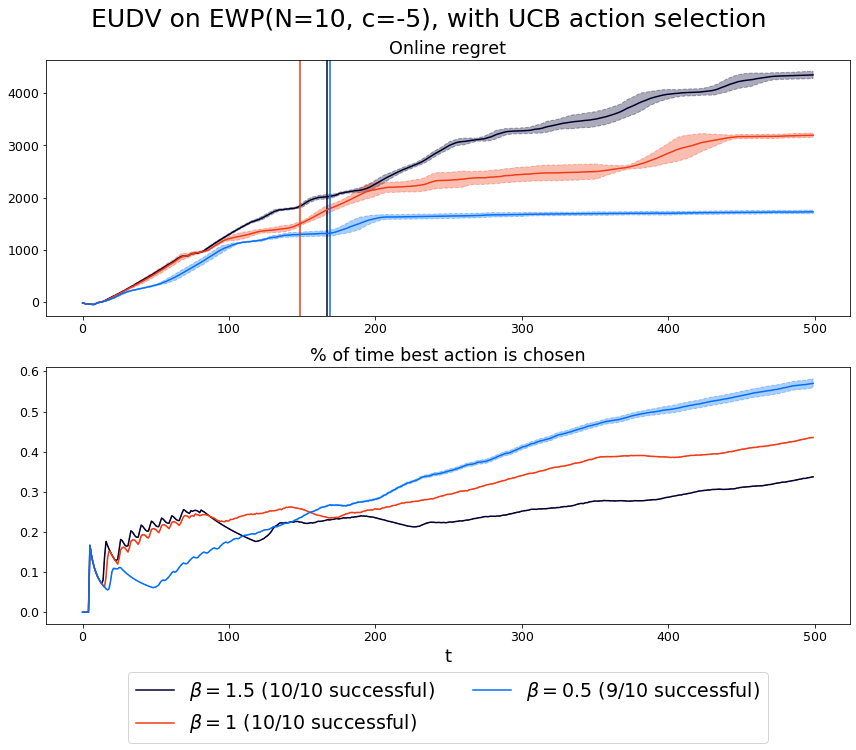

In [19]:
spl_eudv.plot_regret(color_codes = color_codes, 
                    legend_codes = legend_codes, 
                    title = 'EUDV on EWP(N=10, c=-5), with UCB action selection',
                    bbox = (0.5, -0.5),
                    figsize = (12,10), 
                    ncol = 2, 
                    rect = [0, -0.05, 1, 0.95],
                    dpi = 300)

In [20]:
colors = {'beta_1': {'mean': '#3138fb', 'var': '#3138fb'}}

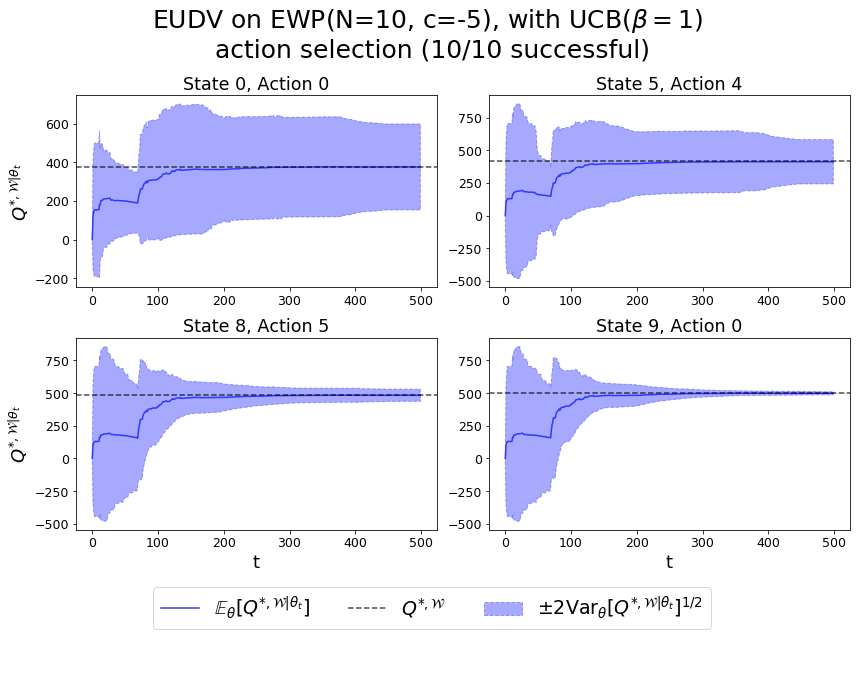

In [21]:
spl_eudv.plot_Q_u(colors = colors,  
                 title = r'EUDV on EWP(N=10, c=-5), with UCB($\beta = 1$)' + ' \n action selection',
                 list_agents = ['beta_1'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (5,4), (8,5), (9,0)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

### And finally with EUB

In [22]:
len_episode = 1000

spl_eub = SimplePlotter('EWP_UCB_EUB',
                    env,
                    BayesianAgent.default(decision_making_method = 'UCB',
                                          decision_making_method_params = 1, 
                                          Q_method = 'predictive',
                                          u_method = 'EUB',
                                          name = 'beta_1', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'UCB',
                                          decision_making_method_params = 0.5, 
                                          Q_method = 'predictive',
                                          u_method = 'EUB',
                                          name = 'beta_0p5', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'UCB',
                                          decision_making_method_params = 0.1, 
                                          Q_method = 'predictive',
                                          u_method = 'EUB',
                                          name = 'beta_0p1', 
                                          gamma =  0.98))

spl_eub.run_experiments(len_episode, 5, fair_comparison = False)

100%|██████████| 1000/1000 [03:04<00:00,  5.41it/s]


In [23]:
color_codes = {'beta_1': "#00002f", 
               'beta_0p5': "#f23a14",
               'beta_0p1': "#006ffb"}

legend_codes = {'beta_1': r'$\beta = 1$', 
               'beta_0p5': r'$\beta = 0.5$',
               'beta_0p1': r'$\beta = 0.1$'}

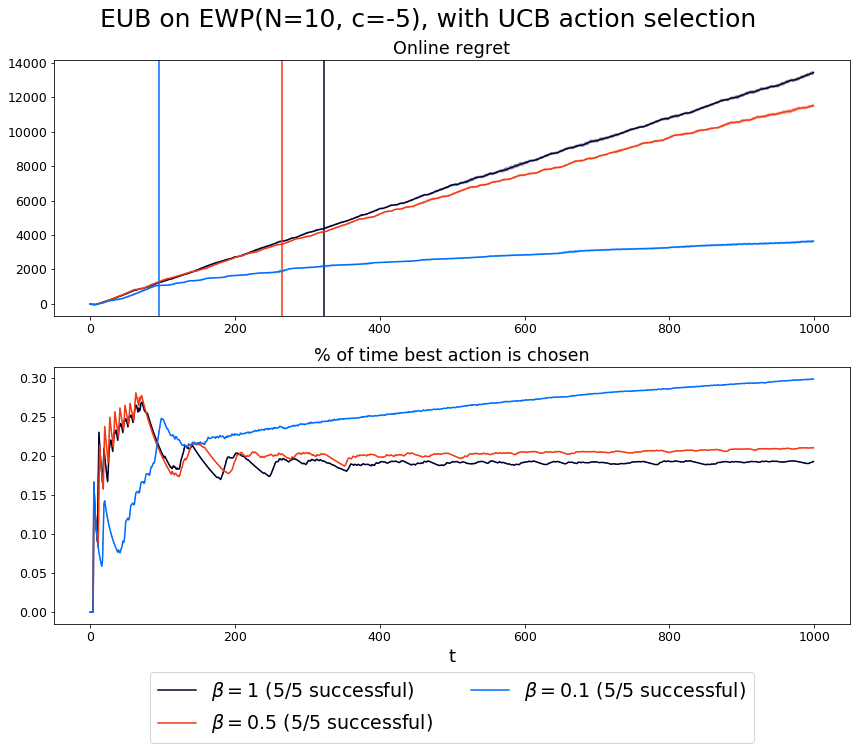

In [24]:
spl_eub.plot_regret(color_codes = color_codes, 
                    legend_codes = legend_codes, 
                    title = 'EUB on EWP(N=10, c=-5), with UCB action selection',
                    bbox = (0.5, -0.5),
                    figsize = (12,10), 
                    ncol = 2, 
                    rect = [0, -0.05, 1, 0.95],
                    dpi = 300)

In [25]:
colors = {'beta_0p1': {'mean': '#f30894', 'var': '#f30894'}}

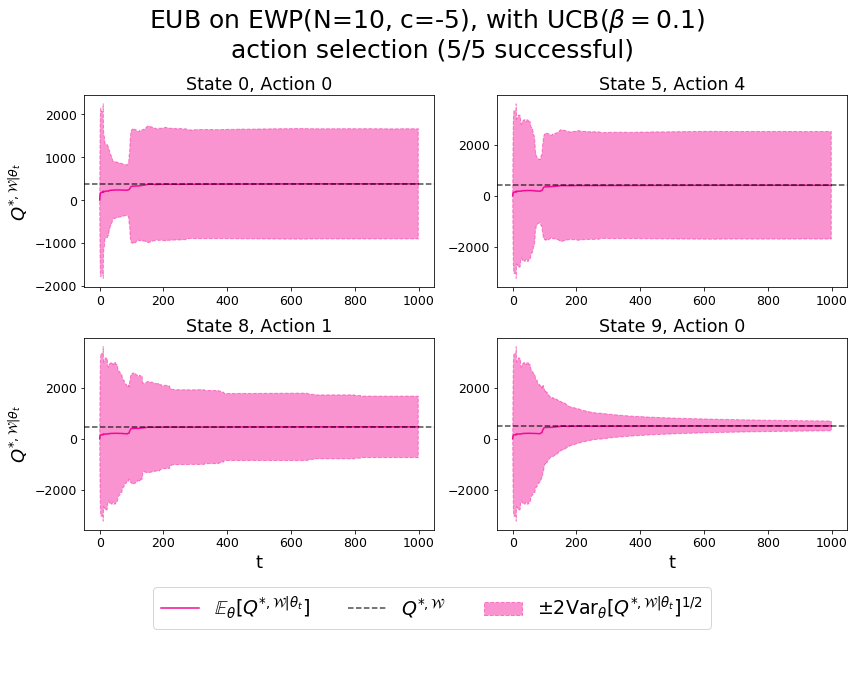

In [26]:
spl_eub.plot_Q_u(colors = colors,  
                 title = r'EUB on EWP(N=10, c=-5), with UCB($\beta = 0.1$)' + ' \n action selection',
                 list_agents = ['beta_0p1'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (5,4), (8,1), (9,0)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

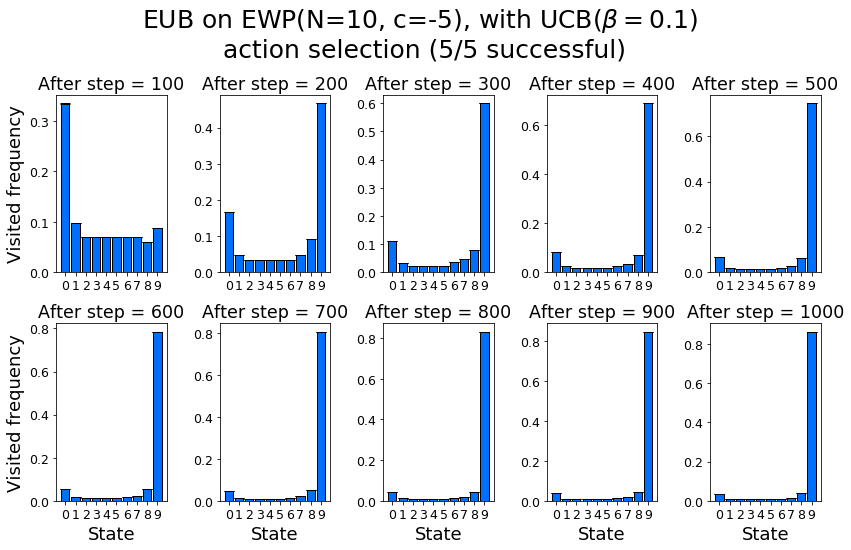

In [27]:
spl_eub.plot_state_freq(list_agents = ['beta_0p1'], 
                        colors = color_codes,
                        title = r'EUB on EWP(N=10, c=-5), with UCB($\beta = 0.1$)' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

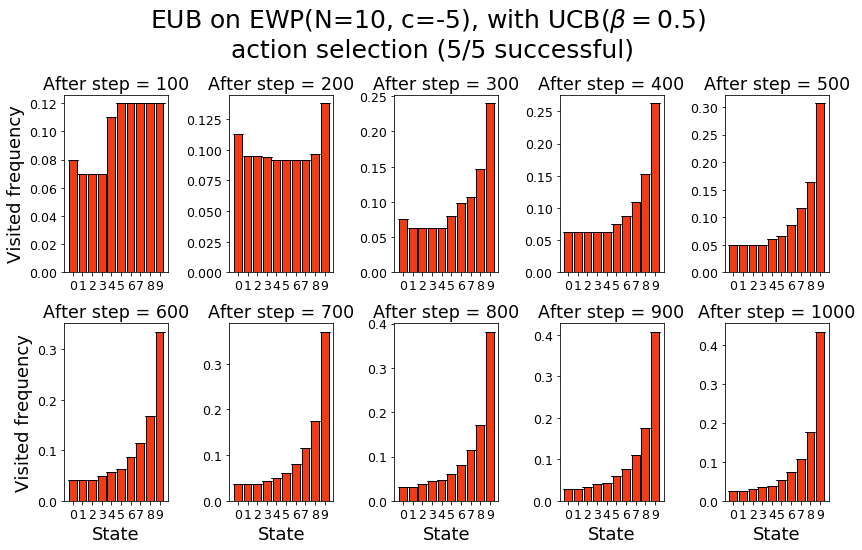

In [28]:
spl_eub.plot_state_freq(list_agents = ['beta_0p5'], 
                        colors = color_codes,
                        title = r'EUB on EWP(N=10, c=-5), with UCB($\beta = 0.5$)' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

# Thompson Sampling

### UBE

In [37]:
len_episode = 1200

spl_ube = SimplePlotter('EWP_TS_UBE',
                    env,
                    BayesianAgent.default(decision_making_method = 'ThompsonSampling',
                                          decision_making_method_params = 1.5, 
                                          Q_method = 'predictive',
                                          u_method = 'UBE',
                                          name = 'beta_1p5', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'ThompsonSampling',
                                          decision_making_method_params = 1, 
                                          Q_method = 'predictive',
                                          u_method = 'UBE',
                                          name = 'beta_1', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'ThompsonSampling',
                                          decision_making_method_params = 0.5, 
                                          Q_method = 'predictive',
                                          u_method = 'UBE',
                                          name = 'beta_0p5', 
                                          gamma =  0.98))

spl_ube.run_experiments(len_episode, 10, fair_comparison = False)

100%|██████████| 1200/1200 [00:41<00:00, 28.84it/s]


In [38]:
color_codes = {'beta_1p5': "#00002f", 
               'beta_1': "#f23a14",
               'beta_0p5': "#006ffb"}

legend_codes = {'beta_1p5': r'$\beta = 1.5$', 
               'beta_1': r'$\beta = 1$',
               'beta_0p5': r'$\beta = 0.5$'}

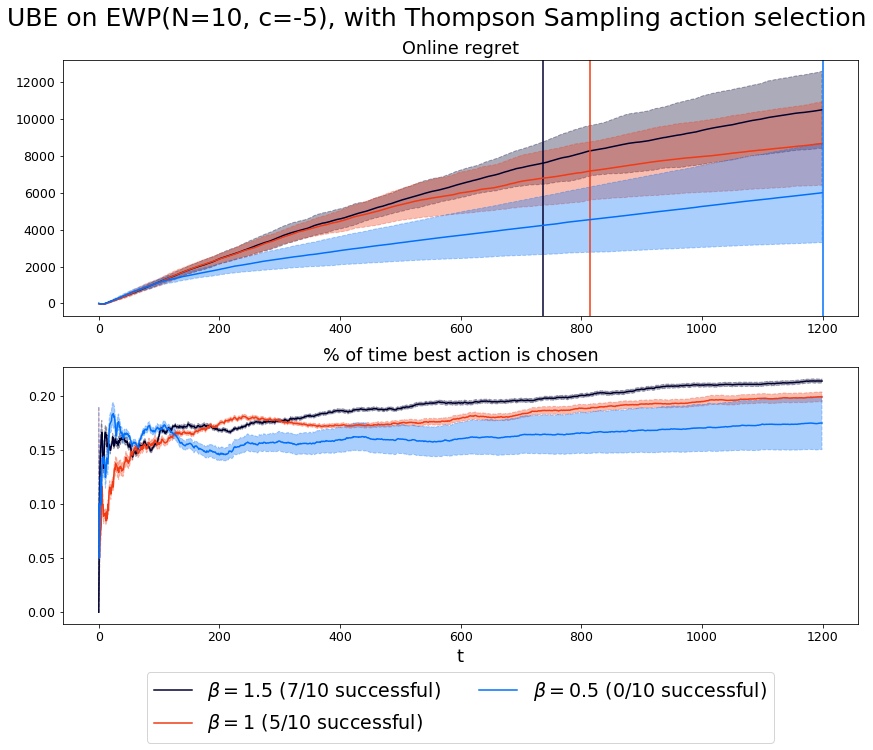

In [39]:
spl_ube.plot_regret(color_codes = color_codes, 
                    legend_codes = legend_codes, 
                    title = 'UBE on EWP(N=10, c=-5), with Thompson Sampling action selection',
                    bbox = (0.5, -0.5),
                    figsize = (12,10), 
                    ncol = 2, 
                    rect = [0, -0.05, 1, 0.95],
                    dpi = 300)

In [40]:
colors = {'beta_0p5': {'mean': '#f23a14', 'var': '#f23a14'},
          'beta_1p5': {'mean': '#f23a14', 'var': '#f23a14'}}

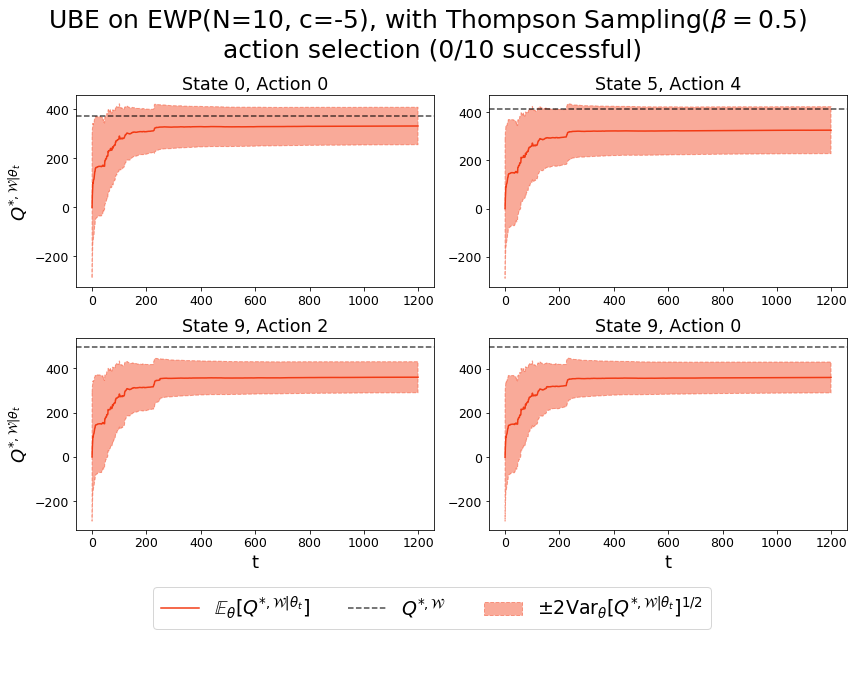

In [41]:
spl_ube.plot_Q_u(colors = colors,  
                 title = r'UBE on EWP(N=10, c=-5), with Thompson Sampling($\beta = 0.5$)' + ' \n action selection',
                 list_agents = ['beta_0p5'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (5,4), (9,2), (9,0)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

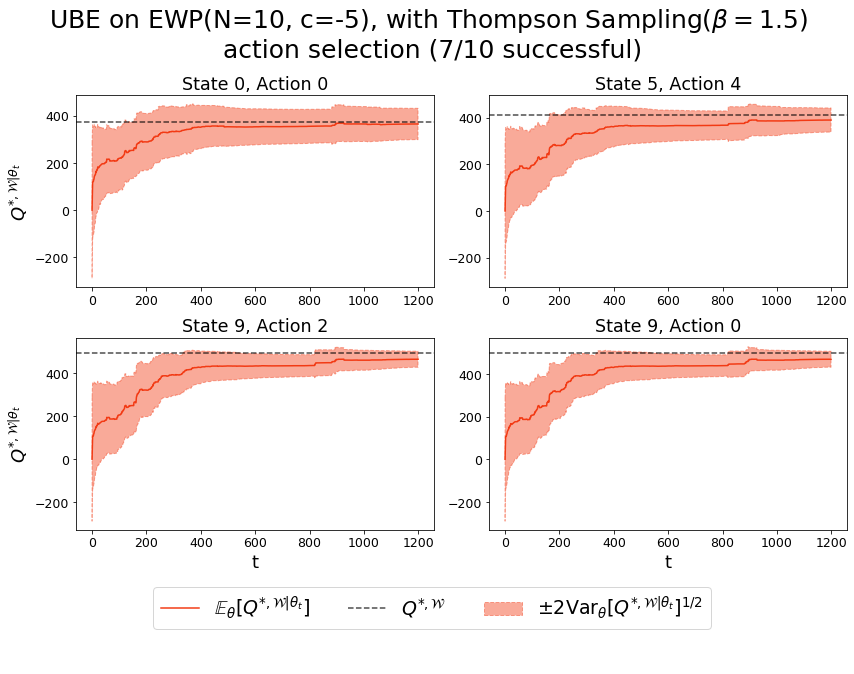

In [42]:
spl_ube.plot_Q_u(colors = colors,  
                 title = r'UBE on EWP(N=10, c=-5), with Thompson Sampling($\beta = 1.5$)' + '\n action selection',
                 list_agents = ['beta_1p5'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (5,4), (9,2), (9,0)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

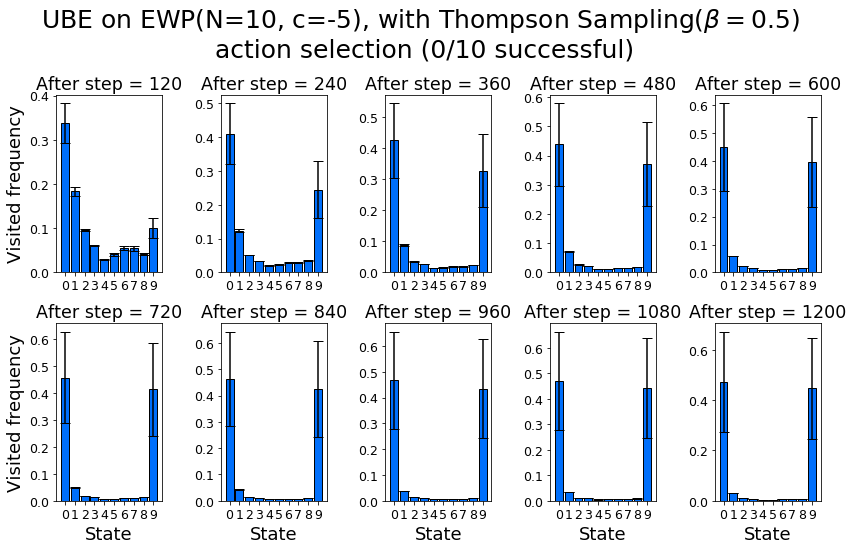

In [43]:
spl_ube.plot_state_freq(list_agents = ['beta_0p5'], 
                        colors = color_codes,
                        title = r'UBE on EWP(N=10, c=-5), with Thompson Sampling($\beta = 0.5$)' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

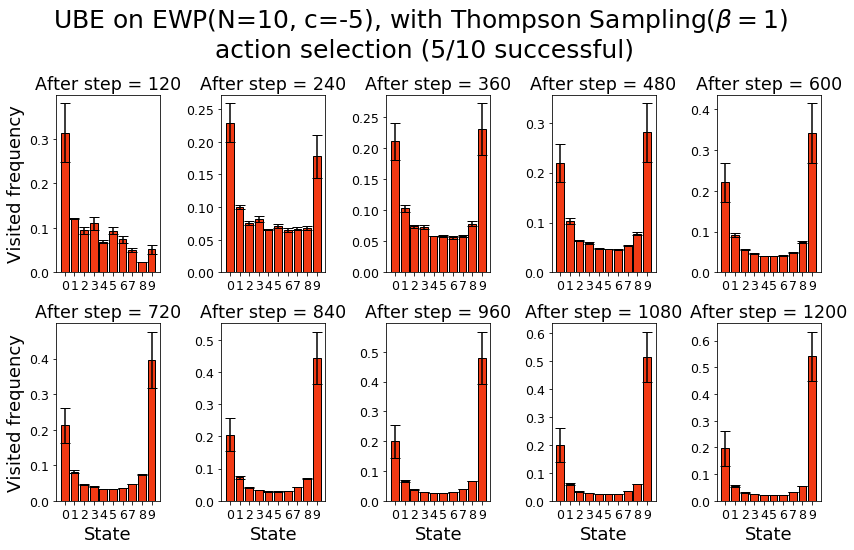

In [44]:
spl_ube.plot_state_freq(list_agents = ['beta_1'], 
                        colors = color_codes,
                        title = r'UBE on EWP(N=10, c=-5), with Thompson Sampling($\beta = 1$)' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

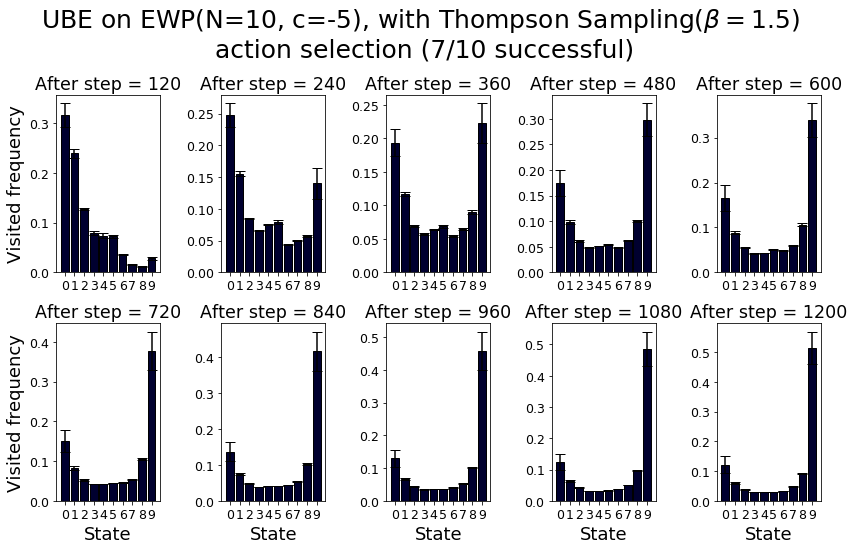

In [45]:
spl_ube.plot_state_freq(list_agents = ['beta_1p5'], 
                        colors = color_codes,
                        title = r'UBE on EWP(N=10, c=-5), with Thompson Sampling($\beta = 1.5$)' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

### EUDV

In [46]:
len_episode = 1200

spl_eudv = SimplePlotter('EWP_TS_EUDV',
                    env,
                    BayesianAgent.default(decision_making_method = 'ThompsonSampling',
                                          decision_making_method_params = 1.5, 
                                          Q_method = 'predictive',
                                          u_method = 'predictive',
                                          name = 'beta_1p5', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'ThompsonSampling',
                                          decision_making_method_params = 1, 
                                          Q_method = 'predictive',
                                          u_method = 'predictive',
                                          name = 'beta_1', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'ThompsonSampling',
                                          decision_making_method_params = 0.5, 
                                          Q_method = 'predictive',
                                          u_method = 'predictive',
                                          name = 'beta_0p5', 
                                          gamma =  0.98))

spl_eudv.run_experiments(len_episode, 10, fair_comparison = False)

100%|██████████| 1200/1200 [00:34<00:00, 34.42it/s]


In [47]:
color_codes = {'beta_1p5': "#00002f", 
               'beta_1': "#f23a14",
               'beta_0p5': "#006ffb"}

legend_codes = {'beta_1p5': r'$\beta = 1.5$', 
               'beta_1': r'$\beta = 1$',
               'beta_0p5': r'$\beta = 0.5$'}

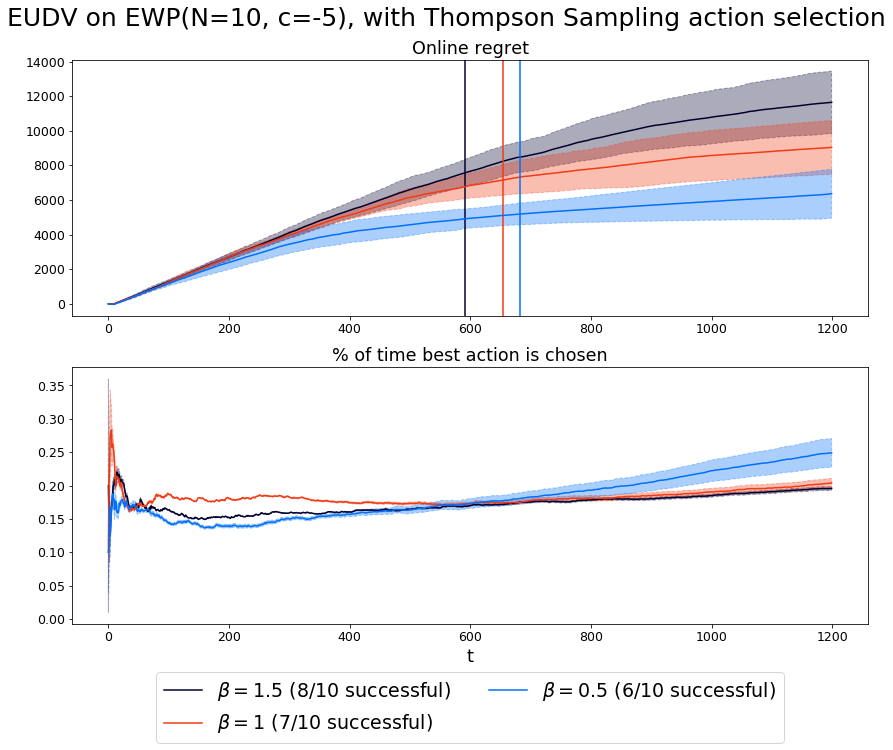

In [48]:
spl_eudv.plot_regret(color_codes = color_codes, 
                     legend_codes = legend_codes, 
                     title = 'EUDV on EWP(N=10, c=-5), with Thompson Sampling action selection',
                     bbox = (0.5, -0.5),
                    figsize = (12,10), 
                    ncol = 2, 
                    rect = [0, -0.05, 1, 0.95],
                    dpi = 300)

In [49]:
colors = {'beta_0p5': {'mean': '#3138fb', 'var': '#3138fb'},
          'beta_1': {'mean': '#3138fb', 'var': '#3138fb'}}

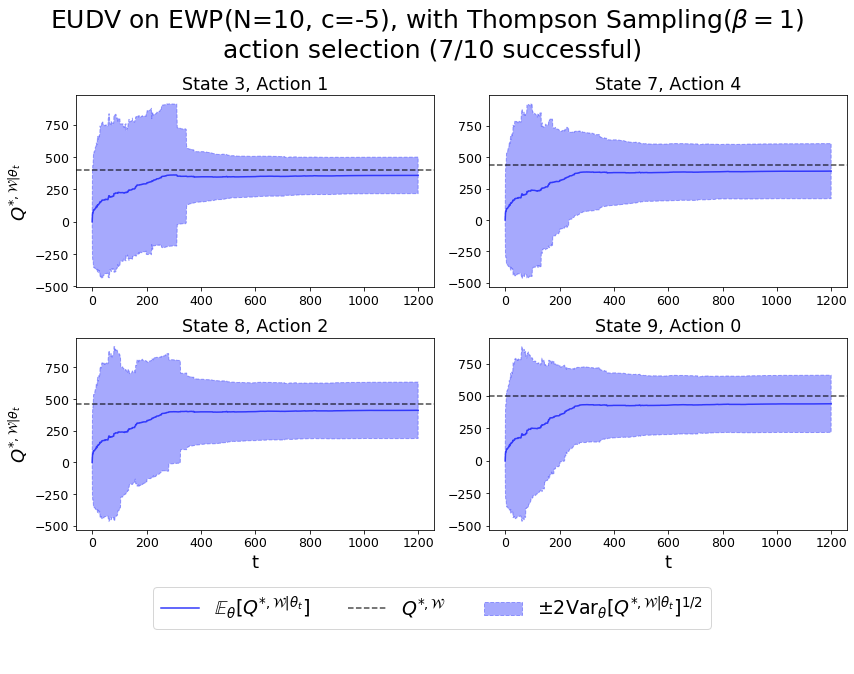

In [50]:
spl_eudv.plot_Q_u(colors = colors,  
                 title = r'EUDV on EWP(N=10, c=-5), with Thompson Sampling($\beta = 1$)' + ' \n action selection',
                 list_agents = ['beta_1'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(3,1), (7,4), (8,2), (9,0)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

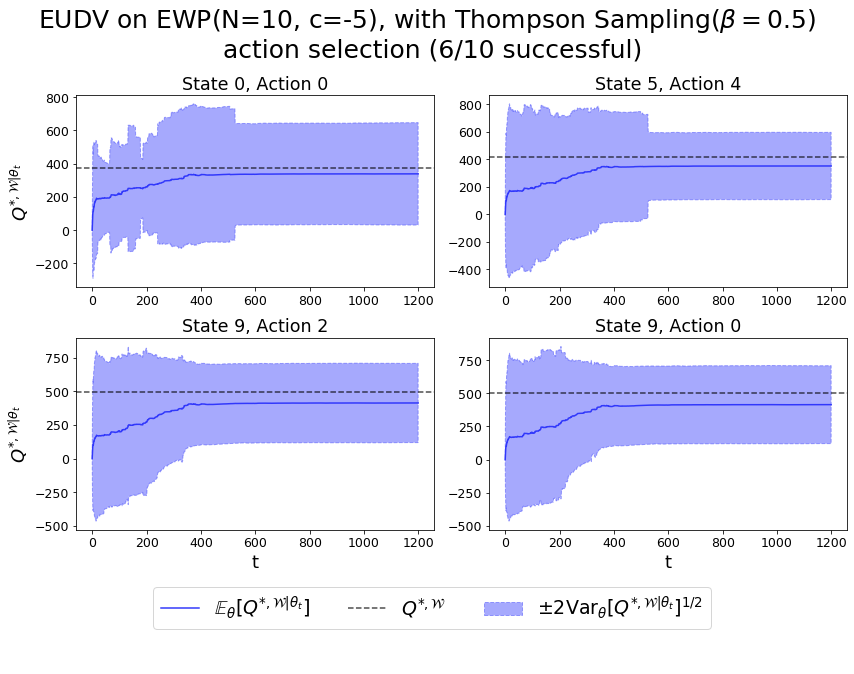

In [51]:
spl_eudv.plot_Q_u(colors = colors,  
                 title = r'EUDV on EWP(N=10, c=-5), with Thompson Sampling($\beta = 0.5$)' + ' \n action selection',
                 list_agents = ['beta_0p5'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (5,4), (9,2), (9,0)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

### EUB

We can see that EUB exhibits this pathological behaviour, that when he finds the good state, immediately the uncertainty about all the other states it saw before increases

In [52]:
len_episode = 1500


spl_eub = SimplePlotter('EWP_TS_EUB',
                    env,
                    BayesianAgent.default(decision_making_method = 'ThompsonSampling',
                                          decision_making_method_params = 0.25, 
                                          Q_method = 'predictive',
                                          u_method = 'EUB',
                                          name = 'beta_0p25', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'ThompsonSampling',
                                          decision_making_method_params = 0.1, 
                                          Q_method = 'predictive',
                                          u_method = 'EUB',
                                          name = 'beta_0p1', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'ThompsonSampling',
                                          decision_making_method_params = 0.01, 
                                          Q_method = 'predictive',
                                          u_method = 'EUB',
                                          name = 'beta_0p01', 
                                          gamma =  0.98))

spl_eub.run_experiments(len_episode, 5, fair_comparison = False)

100%|██████████| 1500/1500 [04:06<00:00,  6.08it/s]


In [53]:
color_codes = {'beta_0p25': "#00002f", 
               'beta_0p1': "#f23a14",
               'beta_0p01': "#006ffb"}

legend_codes = {'beta_0p25': r'$\beta = 0.25$', 
               'beta_0p1': r'$\beta = 0.1$',
               'beta_0p01': r'$\beta = 0.01$'}

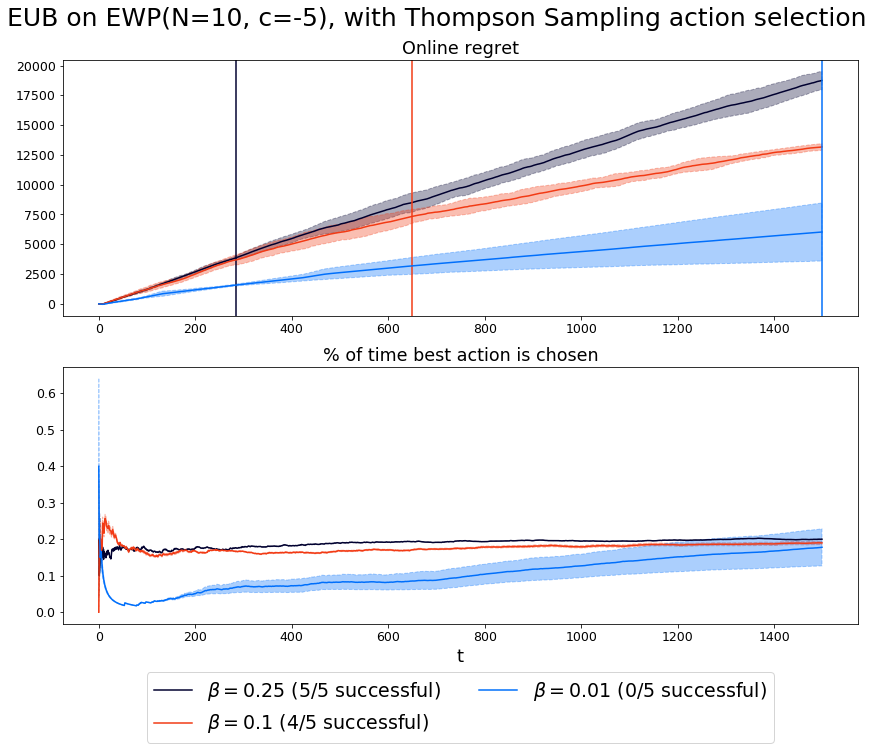

In [54]:
spl_eub.plot_regret(color_codes = color_codes, 
                    legend_codes = legend_codes, 
                    title = 'EUB on EWP(N=10, c=-5), with Thompson Sampling action selection',
                    bbox = (0.5, -0.5),
                    figsize = (12,10), 
                    ncol = 2, 
                    rect = [0, -0.05, 1, 0.95],
                    dpi = 300)

In [55]:
colors = {'beta_0p25': {'mean': '#f30894', 'var': '#f30894'},
          'beta_0p01': {'mean': '#f30894', 'var': '#f30894'}}

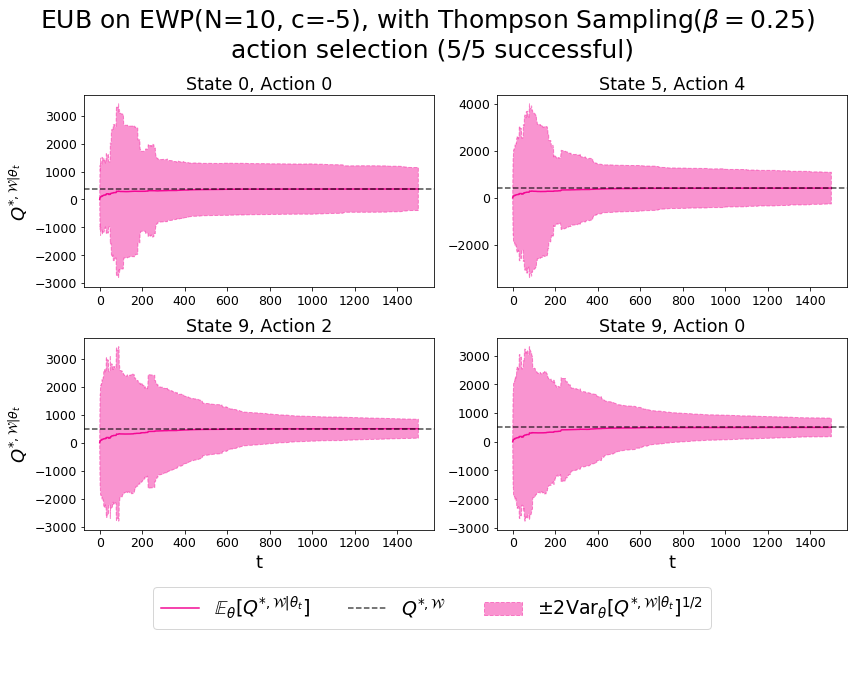

In [56]:
spl_eub.plot_Q_u(colors = colors,  
                 title = r'EUB on EWP(N=10, c=-5), with Thompson Sampling($\beta = 0.25$)' + ' \n action selection',
                 list_agents = ['beta_0p25'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (5,4), (9,2), (9,0)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

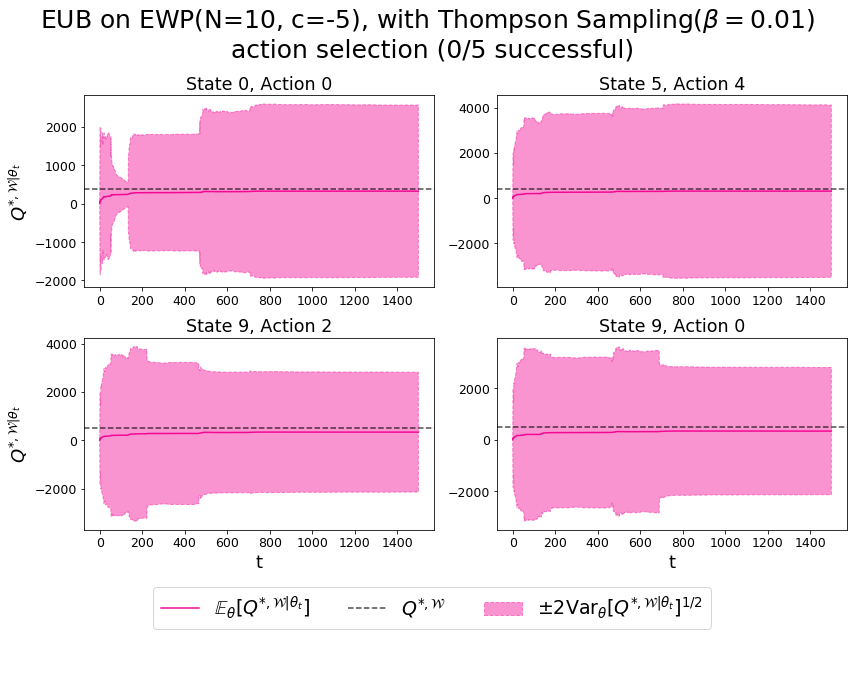

In [57]:
spl_eub.plot_Q_u(colors = colors,  
                 title = r'EUB on EWP(N=10, c=-5), with Thompson Sampling($\beta = 0.01$)' + ' \n action selection',
                 list_agents = ['beta_0p01'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (5,4), (9,2), (9,0)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

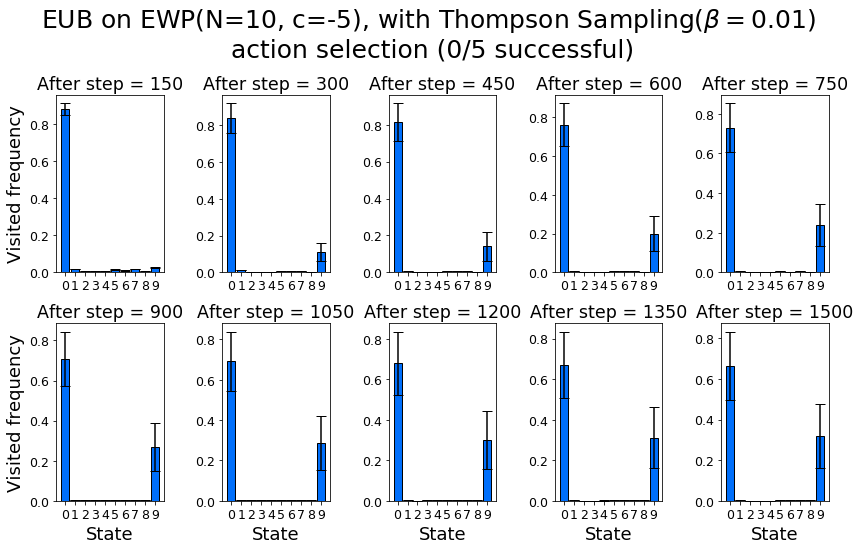

In [59]:
spl_eub.plot_state_freq(list_agents = ['beta_0p01'], 
                        colors = color_codes,
                        title = r'EUB on EWP(N=10, c=-5), with Thompson Sampling($\beta = 0.01$)' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

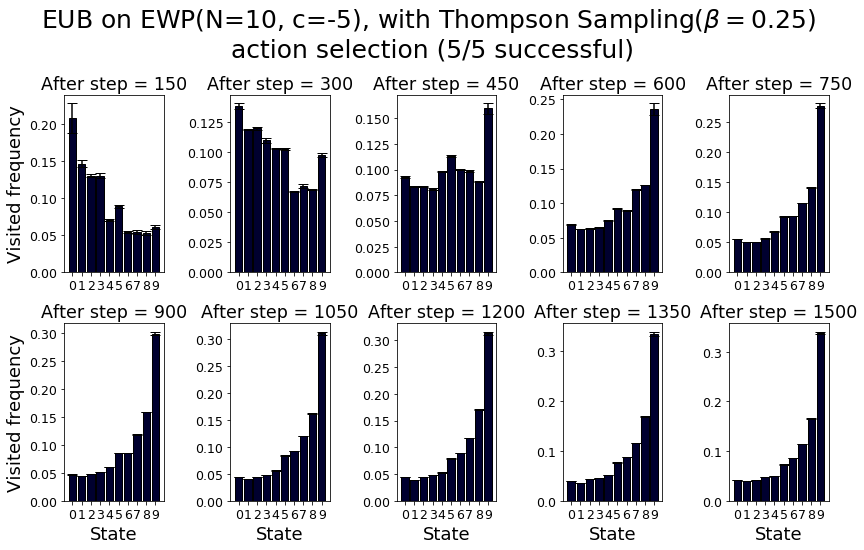

In [60]:
spl_eub.plot_state_freq(list_agents = ['beta_0p25'], 
                        colors = color_codes,
                        title = r'EUB on EWP(N=10, c=-5), with Thompson Sampling($\beta = 0.25$)' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

# GKG1

In [ ]:
len_episode = 1500

spl_gkg = SimplePlotter('EWP_GKG',
                    env,
                    BayesianAgent.default(decision_making_method = 'GKG1',
                                          Q_method = 'predictive',
                                          u_method = 'EUB',
                                          name = 'EUB', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'GKG1',
                                          Q_method = 'predictive',
                                          u_method = 'UBE',
                                          name = 'UBE', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'GKG1',
                                          Q_method = 'predictive',
                                          u_method = 'predictive',
                                          name = 'EUDV', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'GKG1_BO',
                                          Q_method = 'predictive',
                                          u_method = 'EUB',
                                          name = 'EUB_BO', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'GKG1_BO',
                                          Q_method = 'predictive',
                                          u_method = 'UBE',
                                          name = 'UBE_BO', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'GKG1_BO',
                                          Q_method = 'predictive',
                                          u_method = 'predictive',
                                          name = 'EUDV_BO', 
                                          gamma =  0.98))

spl_gkg.run_experiments(len_episode, 5, fair_comparison = False)

  5%|▍         | 74/1500 [01:29<30:44,  1.29s/it]

In [12]:
color_codes = {'EUB': '#f30894',
               'EUDV': '#3138fb',
               'UBE': '#f23a14',
               'EUB_BO': 'green',
               'EUDV_BO': 'blue',
               'UBE_BO': 'red'}

legend_codes = {'EUB': 'EUB',
               'EUDV': 'EUDV',
               'UBE': 'UBE',
                'EUB_BO': 'EUB_BO',
               'EUDV_BO': 'EUDV_BO',
               'UBE_BO': 'UBE_BO'}

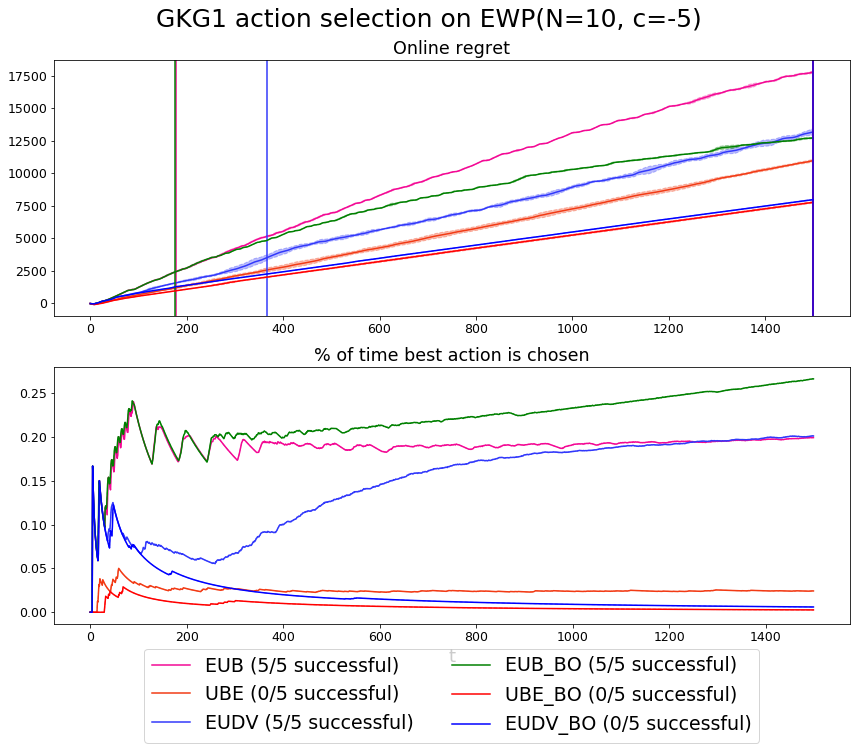

In [9]:
spl_gkg.plot_regret(color_codes = color_codes, 
                    legend_codes = legend_codes, 
                    title = 'GKG1 action selection on EWP(N=10, c=-5)',
                    bbox = (0.5, -0.5),
                    figsize = (12,10), 
                    ncol = 2, 
                    rect = [0, -0.05, 1, 0.95],
                    dpi = 300)

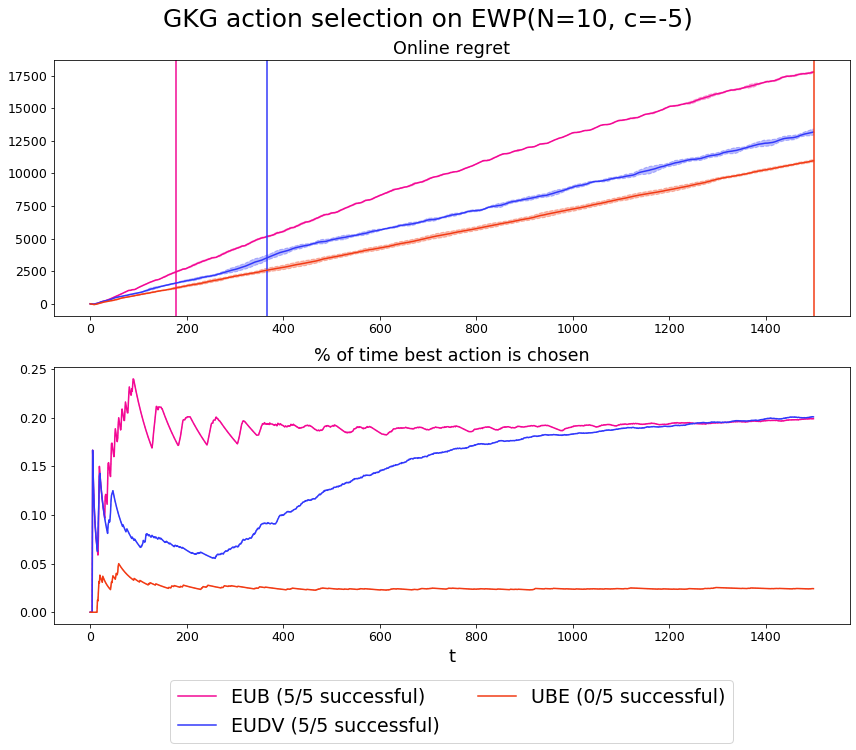

In [13]:
spl_gkg.plot_regret(list_agents = ['EUB', 'EUDV', 'UBE'],
                    color_codes = color_codes, 
                    legend_codes = legend_codes, 
                    title = 'GKG action selection on EWP(N=10, c=-5)',
                    bbox = (0.5, -0.5),
                    figsize = (12,10), 
                    ncol = 2, 
                    rect = [0, -0.05, 1, 0.95],
                    dpi = 300)

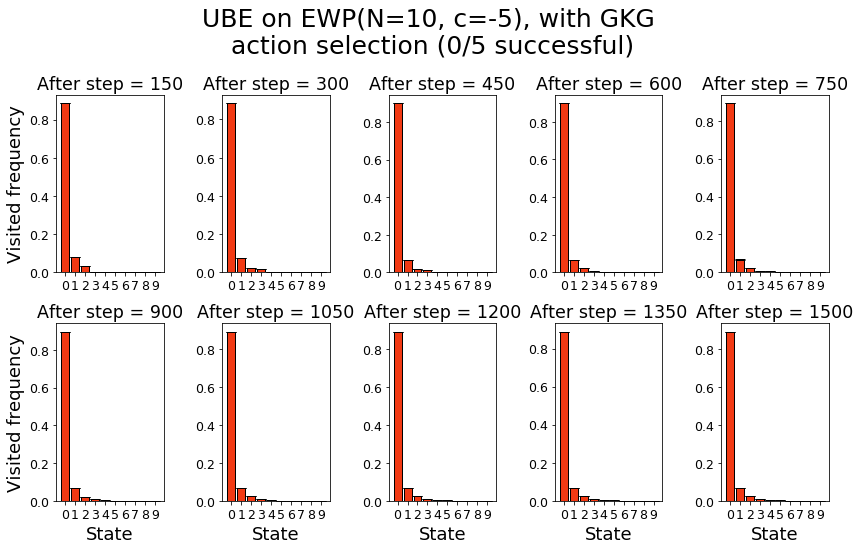

In [14]:
spl_gkg.plot_state_freq(list_agents = ['UBE'], 
                        colors = color_codes,
                        title = r'UBE on EWP(N=10, c=-5), with GKG' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

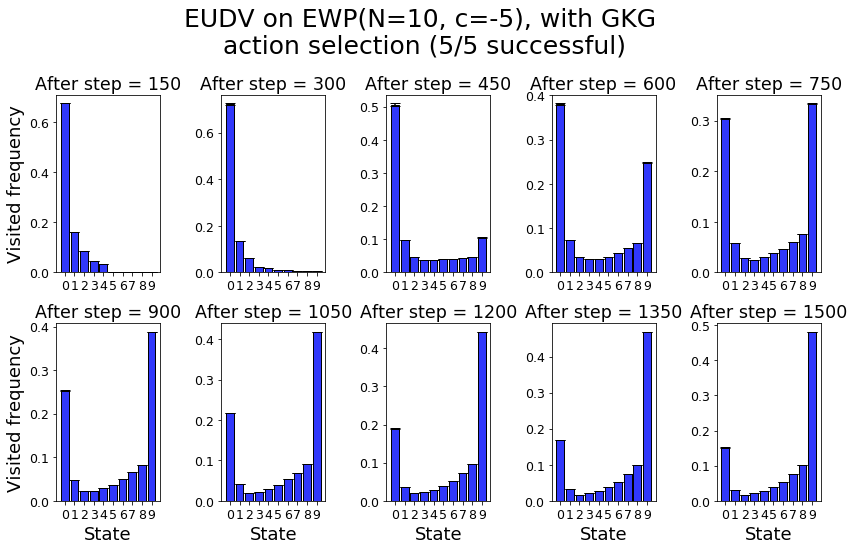

In [15]:
spl_gkg.plot_state_freq(list_agents = ['EUDV'], 
                        colors = color_codes,
                        title = r'EUDV on EWP(N=10, c=-5), with GKG' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

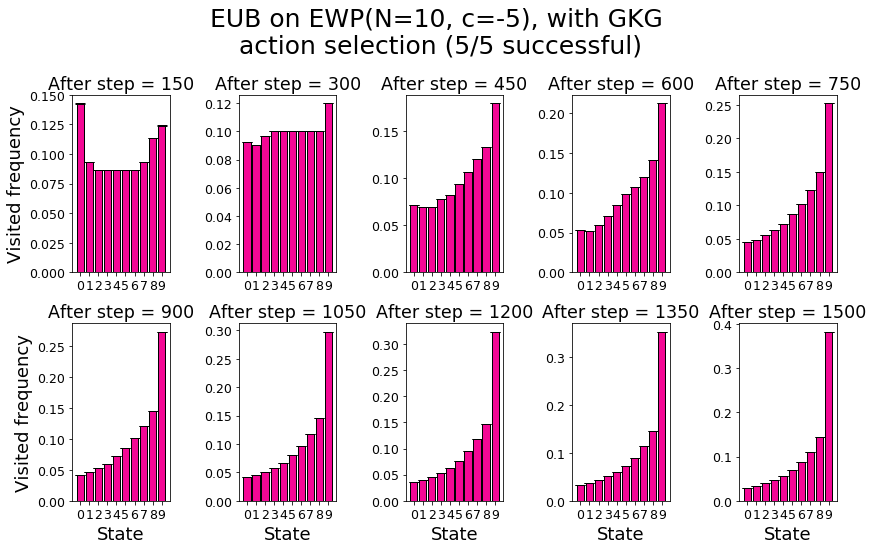

In [16]:
spl_gkg.plot_state_freq(list_agents = ['EUB'], 
                        colors = color_codes,
                        title = r'EUB on EWP(N=10, c=-5), with GKG' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

In [19]:
colors = {'UBE': {'mean': '#f23a14', 'var': '#f23a14'},
          'EUB': {'mean': '#f30894', 'var': '#f30894'},
          'EUDV': {'mean': '#3138fb', 'var': '#3138fb'}}

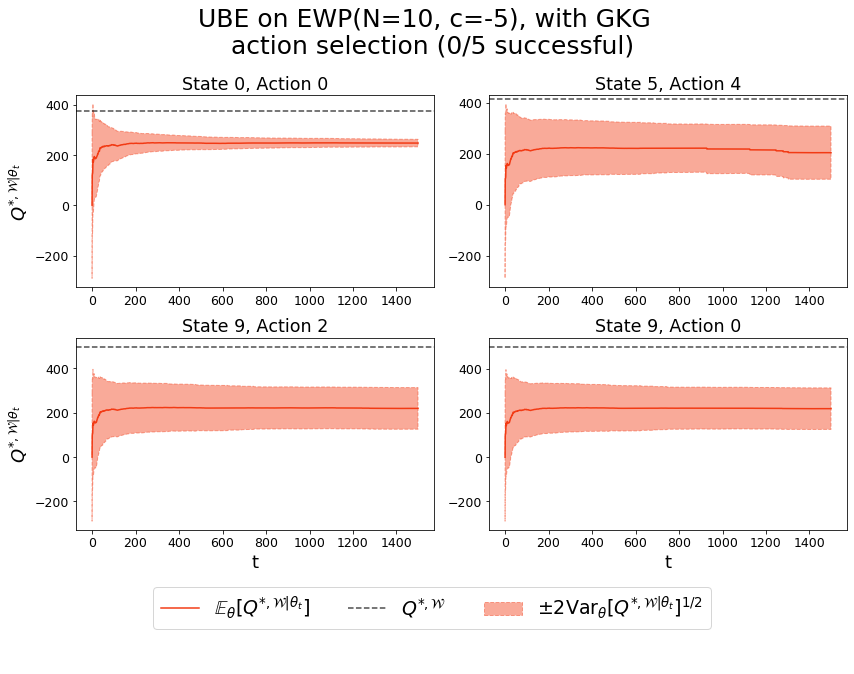

In [20]:
spl_gkg.plot_Q_u(colors = colors,
                 list_agents = ['UBE'],
                 title = r'UBE on EWP(N=10, c=-5), with GKG' + ' \n action selection',
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (5,4), (9,2), (9,0)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

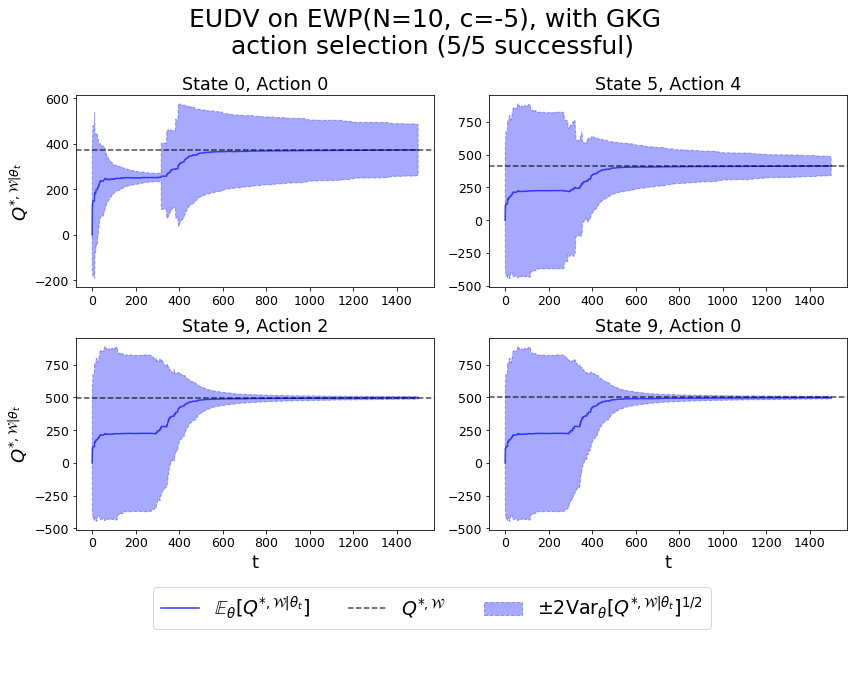

In [25]:
spl_gkg.plot_Q_u(colors = colors,
                 list_agents = ['EUDV'],
                 title = r'EUDV on EWP(N=10, c=-5), with GKG' + ' \n action selection',
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (5,4), (9,2), (9,0)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

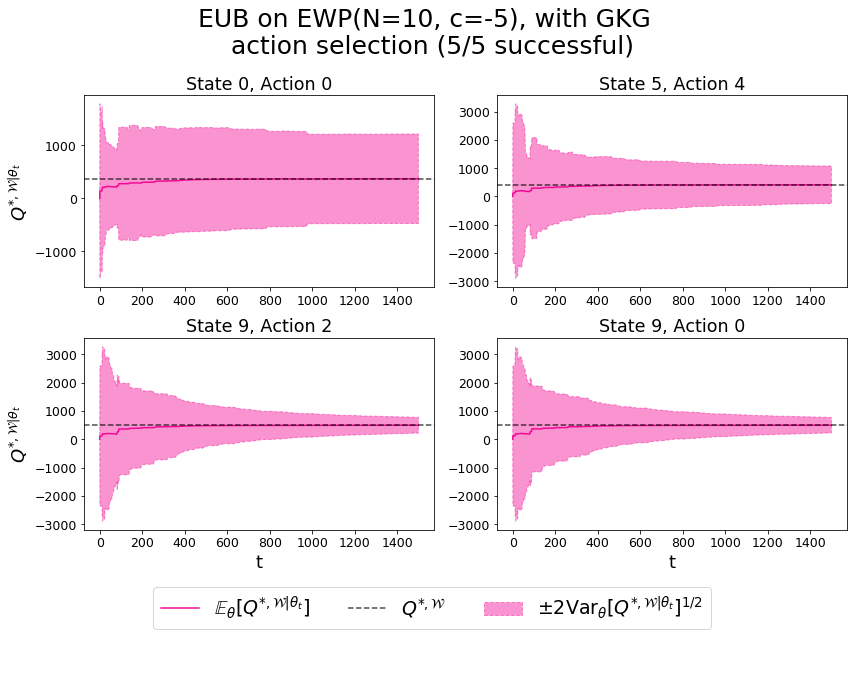

In [26]:
spl_gkg.plot_Q_u(colors = colors,
                 list_agents = ['EUB'],
                 title = r'EUB on EWP(N=10, c=-5), with GKG' + ' \n action selection',
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (5,4), (9,2), (9,0)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

# PSRL

In [4]:
len_episode = 1200

spl_psrl = SimplePlotter('EWP_PSRL',
                    env,
                    BayesianAgent.default(decision_making_method = 'PSRL',
                                          Q_method = 'predictive',
                                          u_method = 'monte_carlo',
                                          u_method_params = 30,
                                          name = 'PSRL', 
                                          gamma =  0.98))

spl_psrl.run_experiments(len_episode, 10, fair_comparison = False)

100%|██████████| 1200/1200 [01:43<00:00, 11.64it/s]


In [5]:
color_codes = {'PSRL': '#1fa843'}

legend_codes = {'PSRL': 'PSRL'}

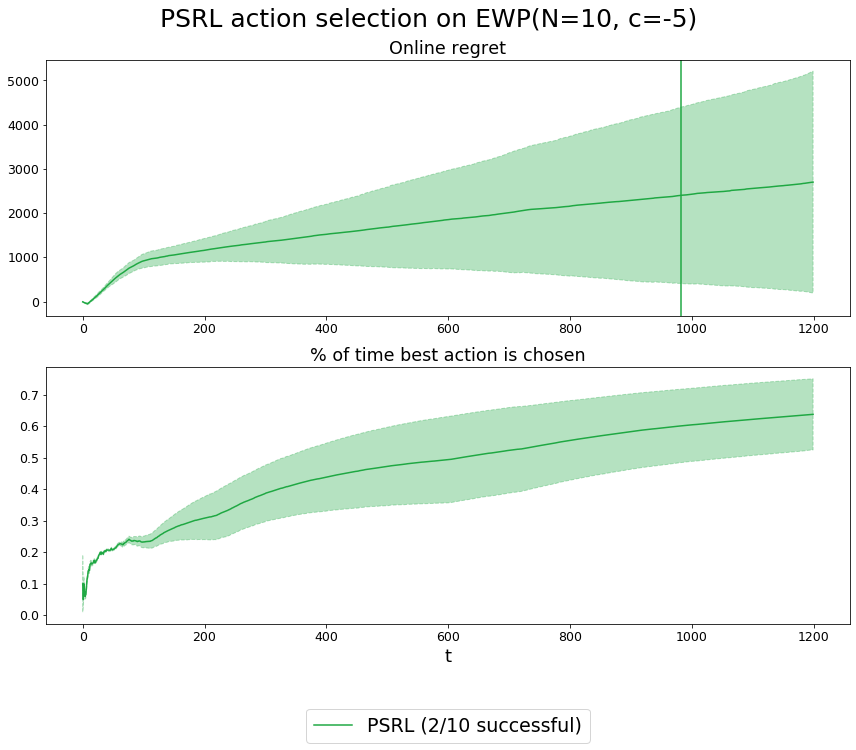

In [6]:
spl_psrl.plot_regret(color_codes = color_codes, 
                    legend_codes = legend_codes, 
                    title = 'PSRL action selection on EWP(N=10, c=-5)',
                    bbox = (0.5, -0.5),
                    figsize = (12,10), 
                    ncol = 2, 
                    rect = [0, -0.05, 1, 0.95],
                    dpi = 300)

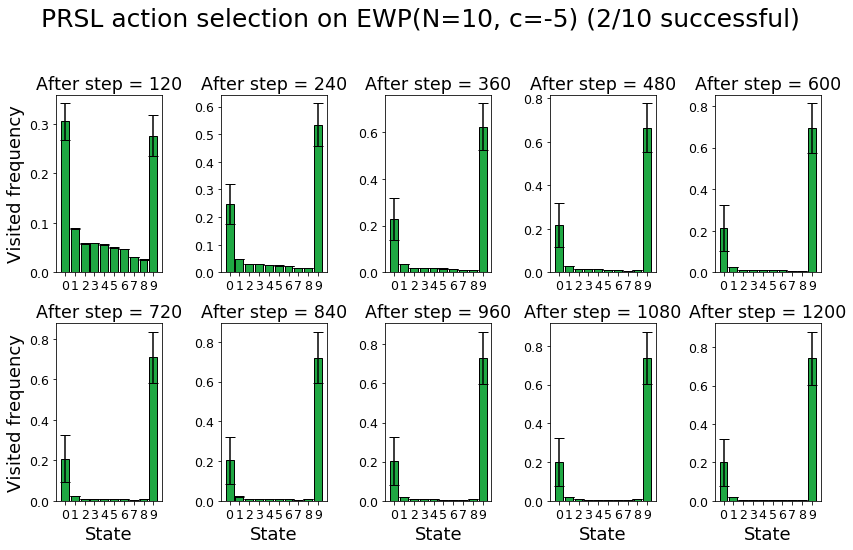

In [7]:
spl_psrl.plot_state_freq(colors = color_codes,
                        title = r'PRSL action selection on EWP(N=10, c=-5)',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

In [8]:
colors = {'PSRL': {'mean': 'red', 'var': 'red'}}

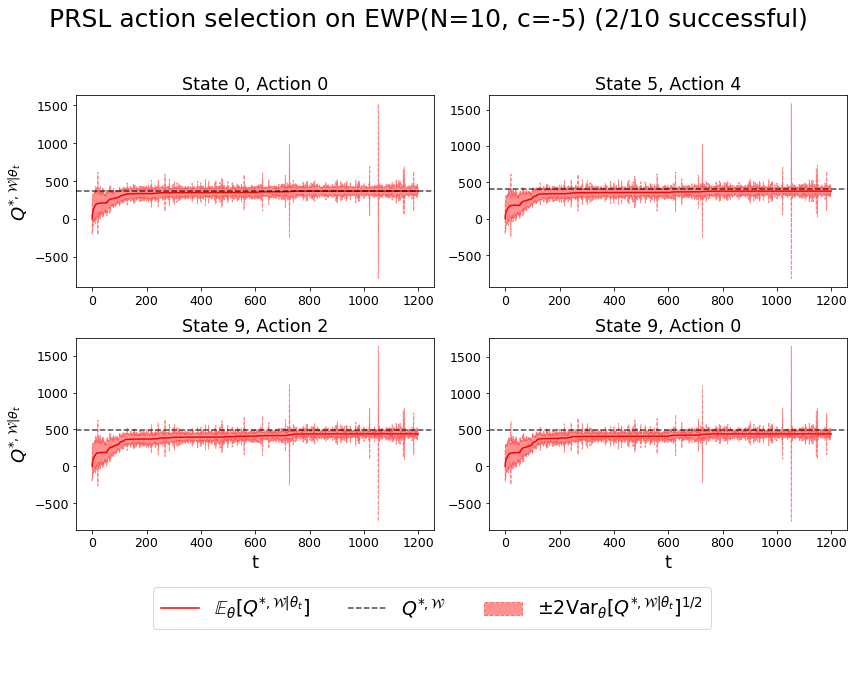

In [9]:
spl_psrl.plot_Q_u(colors = colors,
                 title = r'PRSL action selection on EWP(N=10, c=-5)',
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (5,4), (9,2), (9,0)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

# MCKG

In [10]:
len_episode = 1500

spl_mckg = SimplePlotter('EWP_MCKG',
                    env,
                    BayesianAgent.default(decision_making_method = 'MCKG1',
                                          Q_method = 'predictive',
                                          name = 'MCKG1', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'MCKGN',
                                          decision_making_method_params = 2,
                                          Q_method = 'predictive',
                                          name = 'MCKG2', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'MCKGN',
                                          decision_making_method_params = 3,
                                          Q_method = 'predictive',
                                          name = 'MCKG3', 
                                          gamma =  0.98))

spl_mckg.run_experiments(len_episode, 10, fair_comparison = False)

100%|██████████| 1500/1500 [02:57<00:00,  8.45it/s]


In [11]:
color_codes = {'MCKG3': "#00002f", 
               'MCKG2': "#f23a14",
               'MCKG1': "#006ffb"}

legend_codes = {'MCKG3': 'MCKG-3', 
               'MCKG2': 'MCKG-2',
               'MCKG1': 'MCKG-1'}

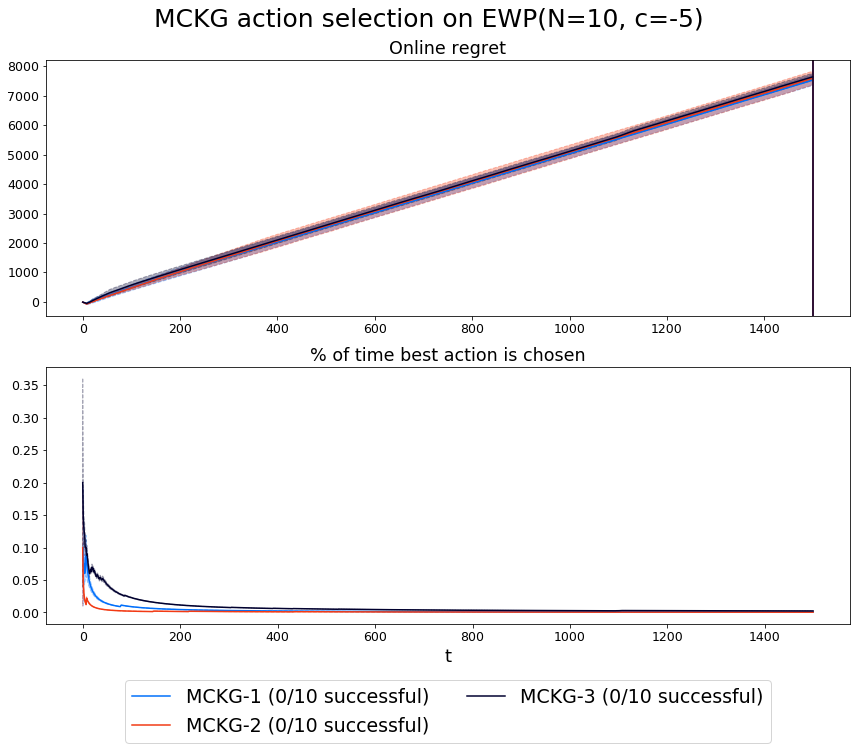

In [12]:
spl_mckg.plot_regret(color_codes = color_codes, 
                    legend_codes = legend_codes, 
                    title = 'MCKG action selection on EWP(N=10, c=-5)',
                    bbox = (0.5, -0.5),
                    figsize = (12,10), 
                    ncol = 2, 
                    rect = [0, -0.05, 1, 0.95],
                    dpi = 300)

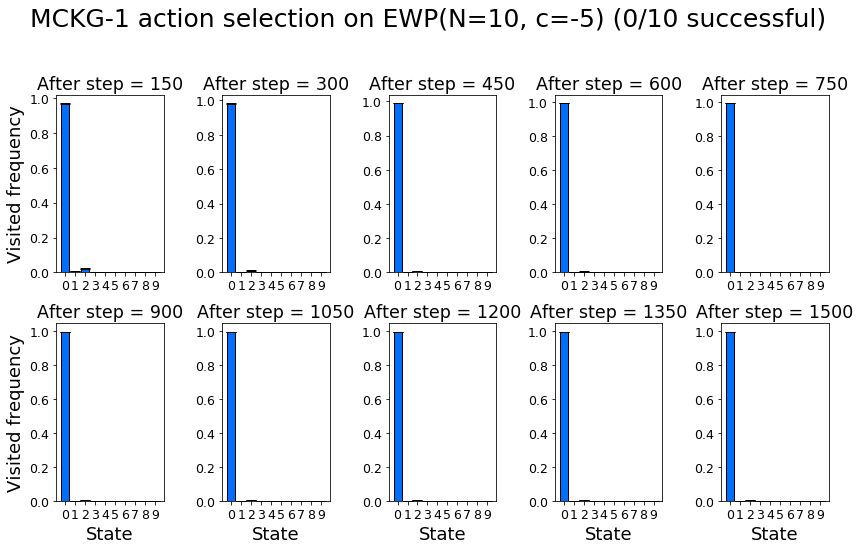

In [13]:
spl_mckg.plot_state_freq(colors = color_codes,
                         list_agents = ['MCKG1'],
                        title = r'MCKG-1 action selection on EWP(N=10, c=-5)',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

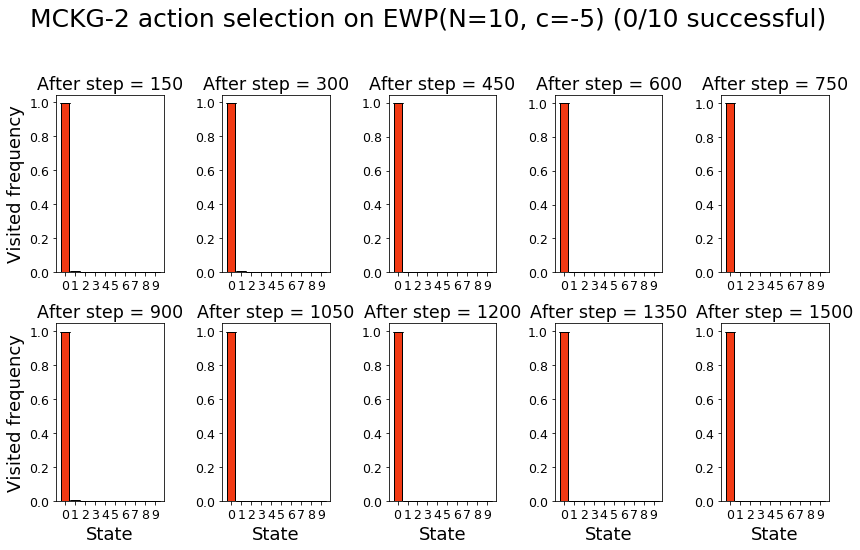

In [14]:
spl_mckg.plot_state_freq(colors = color_codes,
                         list_agents = ['MCKG2'],
                        title = r'MCKG-2 action selection on EWP(N=10, c=-5)',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

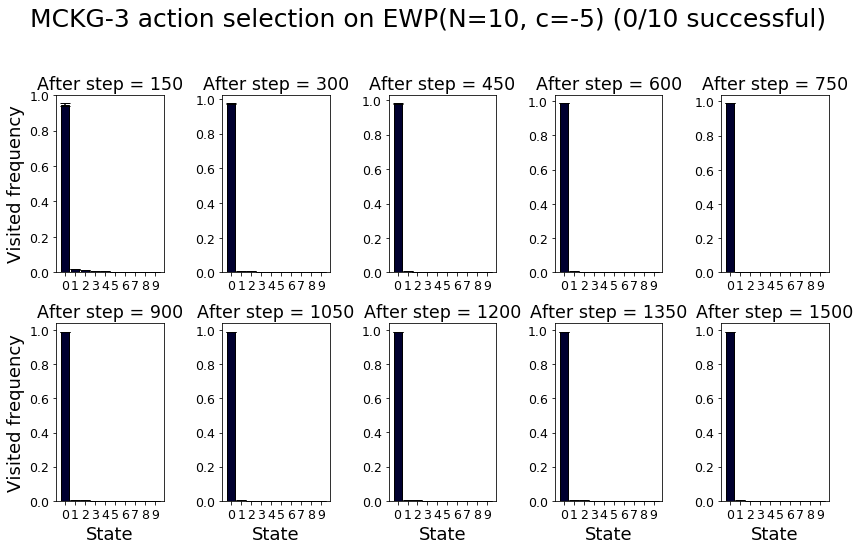

In [15]:
spl_mckg.plot_state_freq(colors = color_codes,
                         list_agents = ['MCKG3'],
                        title = r'MCKG-3 action selection on EWP(N=10, c=-5)',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)